In [114]:
import pandas as pd 
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
test_dir = r"D:\Python projects\Machine Learning\Skin Cancer Prediction\skin_cancer_data\test"
train_dir = r"D:\Python projects\Machine Learning\Skin Cancer Prediction\skin_cancer_data\train"
CATEGORIES = ['benign', 'malignant']

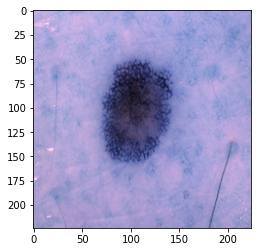

In [116]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

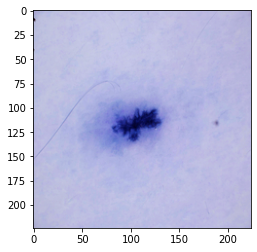

In [117]:
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [118]:
print(img_array.shape)

(224, 224, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

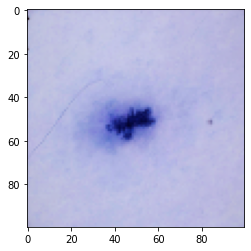

In [119]:
img_size = 100

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show

In [120]:
train_data = []
test_data = []
def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                
                new_array = cv2.resize(img_array, (img_size, img_size))
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
            
get_data(train_dir, train_data)
get_data(test_dir, test_data)

In [121]:
len(train_data)

2637

In [122]:
train_data[0][1]

0

In [123]:
len(test_data)

660

In [124]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [125]:
import numpy as np

X_train = []
y_train = []
X_test = []
y_test = []

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])
                          
split_train_test(train_data, X_train,y_train)
split_train_test(test_data, X_test,y_test)    

In [126]:
X_train = np.array(X_train).reshape(-1,img_size, img_size,3)
X_test = np.array(X_test).reshape(-1,img_size, img_size,3)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [127]:
X_test.shape

(660, 100, 100, 3)

In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten

In [137]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
cnn = models.Sequential([
  
  layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_size,img_size,3)),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

cnn.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])
              
cnn.fit(X_train, y_train, epochs=20)  

Epoch 1/20
83/83 [==============================] - 15s 168ms/step - loss: 8.3391 - accuracy: 0.4532
Epoch 2/20
83/83 [==============================] - 14s 167ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 3/20
83/83 [==============================] - 14s 167ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 4/20
83/83 [==============================] - 14s 168ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 5/20
83/83 [==============================] - 14s 167ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 6/20
83/83 [==============================] - 14s 167ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 7/20
83/83 [==============================] - 14s 168ms/step - loss: 8.3272 - accuracy: 0.4539
Epoch 8/20
14/83 [====>.........................] - ETA: 11s - loss: 7.6587 - accuracy: 0.4978

In [ ]:
cnn.summary()

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_predicted = []
for i in y_pred:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

In [ ]:
y_predicted[:5]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [ ]:
import seaborn as sn

In [ ]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [ ]:
cnn.save("skin_cancer.h5")